# Results Visualizations
> Ignorance is strength

In [ ]:
# hide
import blackhc.project.script

Appended /home/blackhc/PycharmProjects/bald-ical/src to paths
Switched to directory /home/blackhc/PycharmProjects/bald-ical
%load_ext autoreload
%autoreload 2


In [ ]:
import collections
import functools
import math
import os
import re
from collections import namedtuple
from dataclasses import dataclass
from typing import NamedTuple

import laaos
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
import torch

In [ ]:
bald_scores = torch.load("bald_scores.tpickle")

In [ ]:
bald_scores = [scores.numpy() for scores in bald_scores]

In [ ]:
len(bald_scores)

17

In [ ]:
bald_ranks = [(-scores).argsort().argsort() for scores in bald_scores]

In [ ]:
bald_weights = [1 / (ranks + 1) for ranks in bald_ranks]

In [ ]:
coldness = 10

In [ ]:
rows = []
for i, (scores, ranks, weights) in enumerate(zip(bald_scores, bald_ranks, bald_weights)):
    max_score = np.max(scores)
    sum_score = np.sum(scores)
    sum_weights = np.sum(weights)
    
    temp_scaled_log_scores = np.exp(scipy.special.log_softmax(np.log(scores)*coldness))
    temp_scaled_scores = np.exp(scipy.special.log_softmax(scores*coldness))
        
    for score, temp_scaled_score, temp_scaled_log_score, rank, weight in zip(scores, temp_scaled_scores, temp_scaled_log_scores, ranks, weights):
        rows.append(dict(
            iteration=i,
            score=score/sum_score,
            temp_scaled_score=temp_scaled_score,
            temp_scaled_log_score=temp_scaled_log_score,
            rank=rank,
            weight=weight / sum_weights
        ))

In [ ]:
df = pd.DataFrame(rows)
df

,iteration,score,temp_scaled_score,temp_scaled_log_score,rank,weight
0,0,7.873314e-06,1.952866e-07,1.258507e-08,66636,1.226280e-06
1,0,7.223830e-06,1.382482e-07,5.320533e-09,70340,1.161707e-06
2,0,1.580635e-05,1.327342e-05,1.338428e-05,11576,7.058444e-06
3,0,7.040276e-08,3.079047e-09,4.113174e-29,107052,7.633191e-07
4,0,8.626176e-06,2.914490e-07,3.136629e-08,61863,1.320891e-06
...,...,...,...,...,...,...
1968663,16,1.611847e-06,1.200985e-07,2.422671e-18,77260,1.057776e-06
1968664,16,3.760720e-07,9.470254e-08,1.158156e-24,94656,8.633786e-07
1968665,16,6.240365e-07,9.932634e-08,1.832977e-22,89447,9.136574e-07
1968666,16,2.619850e-06,1.457796e-07,3.117600e-16,69205,1.180892e-06


In [ ]:
melted_ranked_df = df.melt(id_vars=["iteration", "rank"], value_vars=["weight", "score", "temp_scaled_score", "temp_scaled_log_score"])

In [ ]:
melted_ranked_df

,iteration,rank,variable,value
0,0,66636,weight,1.226280e-06
1,0,70340,weight,1.161707e-06
2,0,11576,weight,7.058444e-06
3,0,107052,weight,7.633191e-07
4,0,61863,weight,1.320891e-06
...,...,...,...,...
7874667,16,77260,temp_scaled_log_score,2.422671e-18
7874668,16,94656,temp_scaled_log_score,1.158156e-24
7874669,16,89447,temp_scaled_log_score,1.832977e-22
7874670,16,69205,temp_scaled_log_score,3.117600e-16


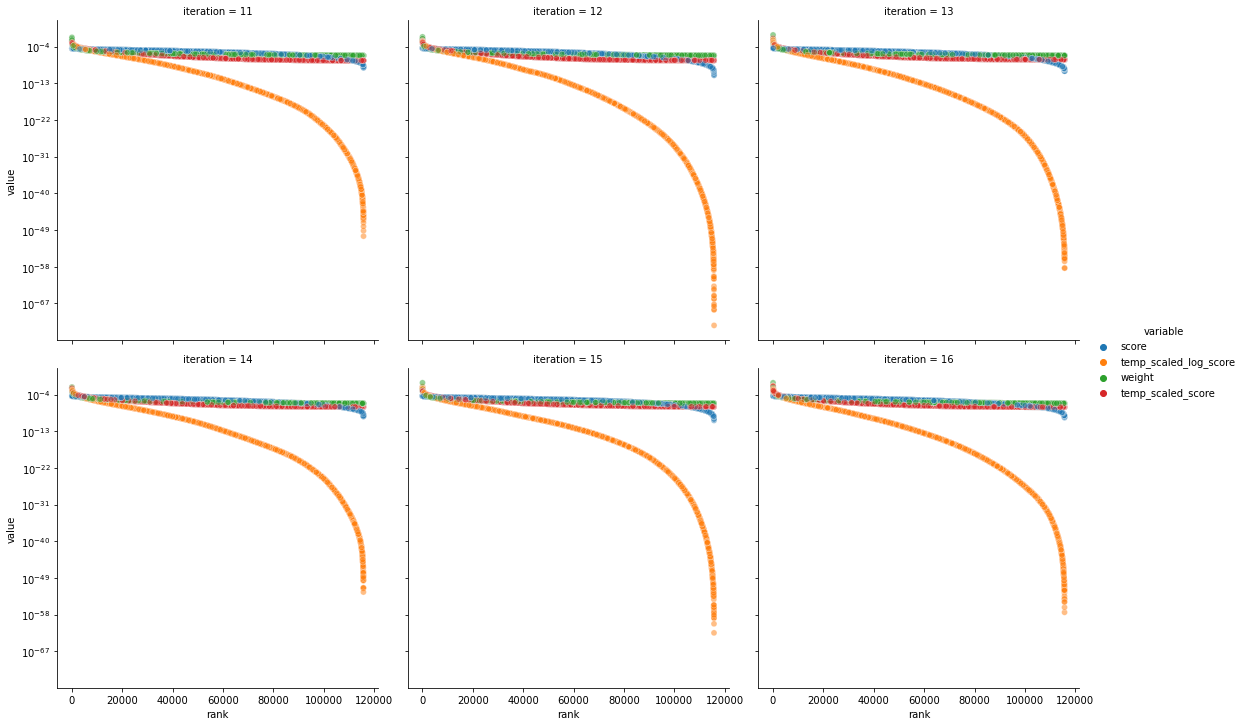

In [ ]:
sns.relplot(data=melted_ranked_df[melted_ranked_df.iteration > 10].sample(frac=0.2),x="rank", y="value", hue="variable", col="iteration", col_wrap=3, alpha=0.5)
plt.yscale('log')

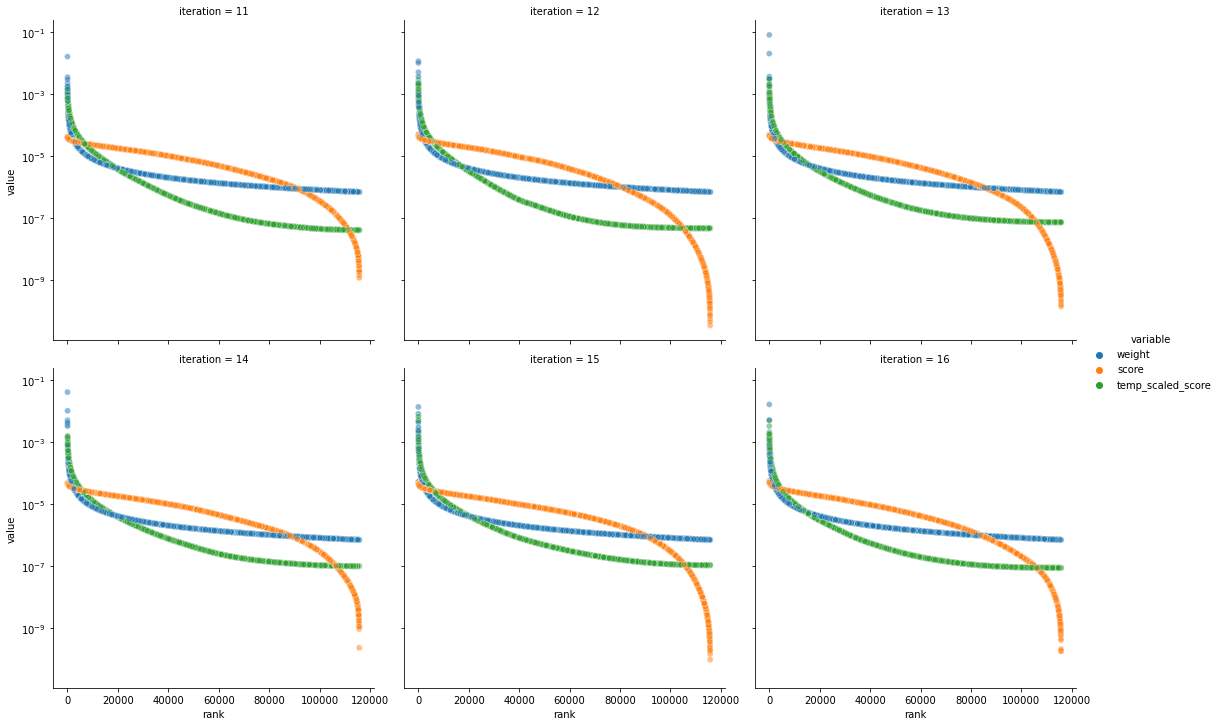

In [ ]:
sns.relplot(data=melted_ranked_df[(melted_ranked_df.iteration > 10) & (melted_ranked_df.variable != "temp_scaled_log_score")].sample(frac=0.1),x="rank", y="value", hue="variable", col="iteration", col_wrap=3, alpha=0.5)
plt.yscale('log')

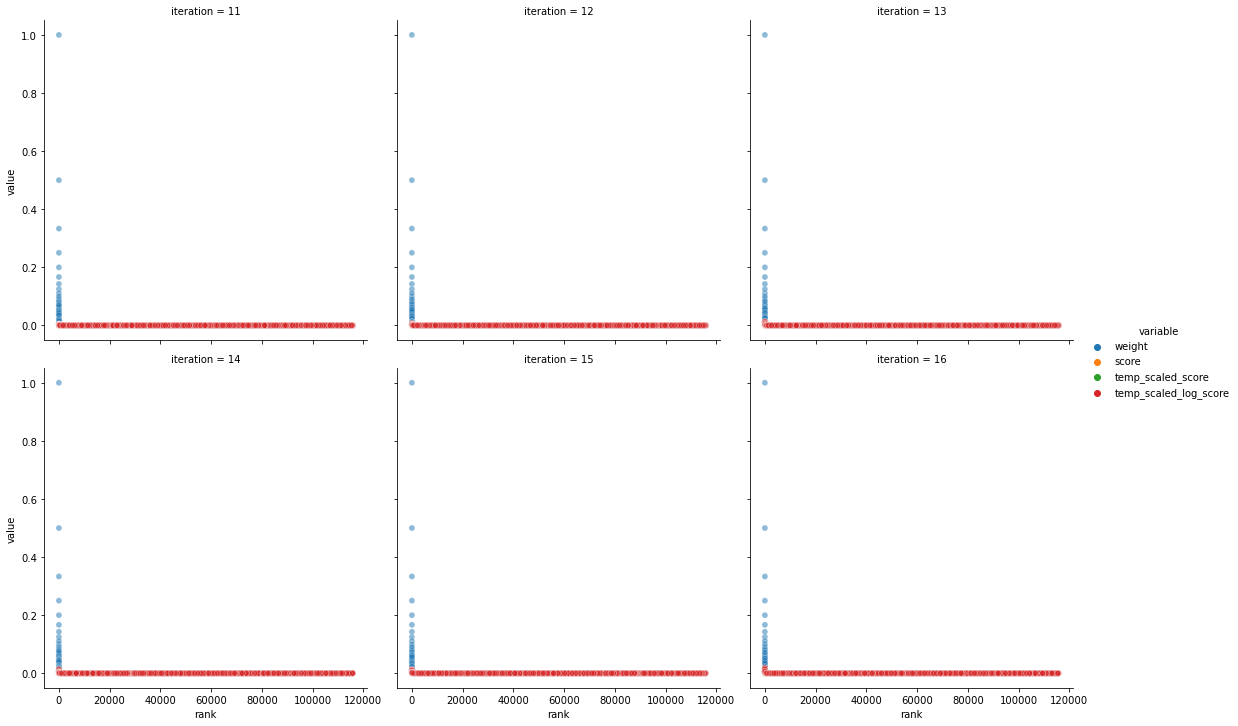

In [ ]:
sns.relplot(data=melted_ranked_df[melted_ranked_df.iteration > 10],x="rank", y="value", hue="variable", col="iteration", col_wrap=3, alpha=0.5)

In [ ]:
sns.relplot(data=df,x="rank", y="score", col="iteration", col_wrap=3, alpha=0.5)

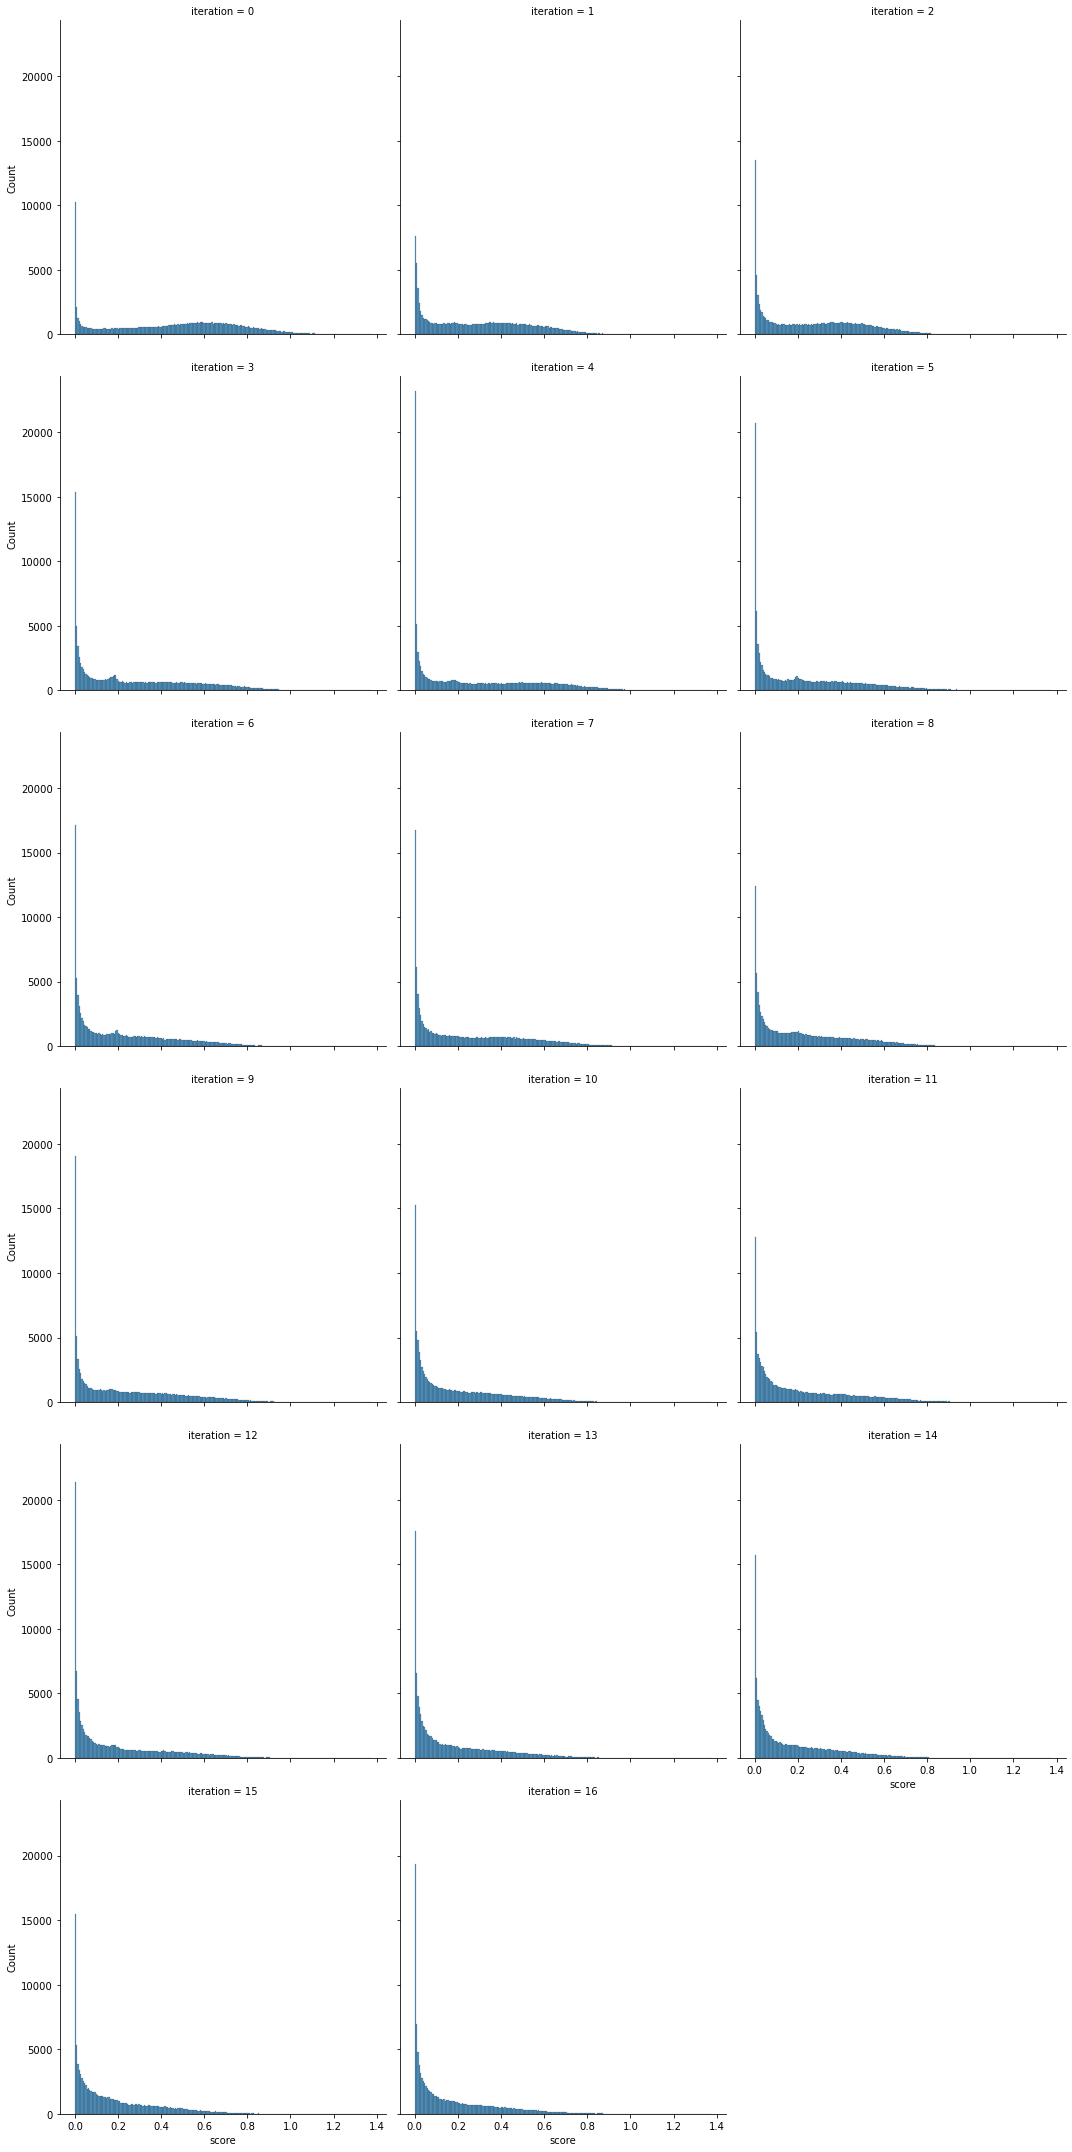

In [ ]:
sns.displot(data=df, x="score", col="iteration", col_wrap=3)

In [ ]:
scores = ranked_df[ranked_df.iteration == 16]

In [ ]:
scores = scores.copy()

In [ ]:
scores[scores["rank"] < 115724-500]["score"].sum()

18777.91191036082

In [ ]:
scores.score.sum()

19224.502285540566

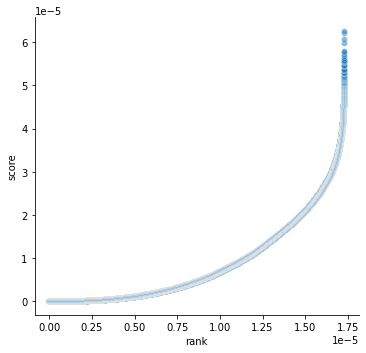

In [ ]:
grd= sns.relplot(data=scores/scores.sum(),x="rank", y="score", alpha=0.5)
grd.fig.patch.set_alpha(1)

In [ ]:
scores["temp_scaled"] = scores.score ** 10

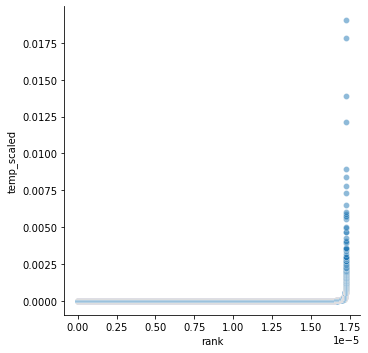

In [ ]:
grd = sns.relplot(data=scores[scores["rank"]>0]/scores.sum(),x="rank", y="temp_scaled", alpha=0.5)
grd.fig.patch.set_alpha(1)

0.17337242696569993

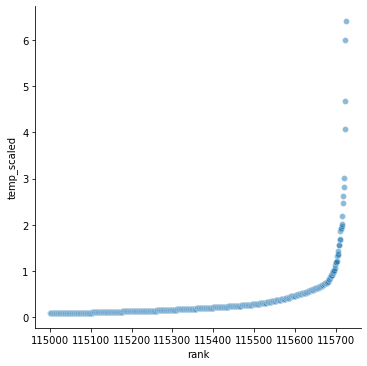

In [ ]:
scores["temp_scaled"] = scores.score.to_numpy(dtype=float)**10

sns.relplot(data=scores[scores["rank"]>115000],x="rank", y="temp_scaled", alpha=0.5)

scores[scores["rank"] > 115700]["temp_scaled"].sum()/scores["temp_scaled"].sum()

In [ ]:
scores["temp_scaled"] = scores.score.to_numpy(dtype=float)**18

indices = list(sorted(np.random.choice(len(scores["temp_scaled"]), size=10, replace=False, p=scores["temp_scaled"]/scores["temp_scaled"].sum())))
indices, scores.iloc[indices].score

([114423,
  114454,
  115643,
  115682,
  115683,
  115698,
  115712,
  115713,
  115722,
  115723],
 16    0.730118
 16    0.732449
 16    0.949316
 16    0.980124
 16     0.98149
 16     1.01651
 16     1.06845
 16     1.07044
 16     1.19645
 16     1.20419
 Name: score, dtype: object)

In [ ]:
len(scores["temp_scaled"])

115724

In [ ]:
torch.zeros(1)**0

tensor([1.])